In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv(
    "C:/Users/admin/Masters-s-project/masters_project/machine_learning/data_analysis/air_pollution_smog_clear.csv",
    index_col="date",
    parse_dates=True,
)
df.pop("entry_id")
# df.pop("pressure")
# df.index.freq='MS'
# df = df.resample('7D').mean()
df.head()

,PM1,PM2.5,PM10,temp,pressure,humidity
date,,,,,,
2021-11-12,21.000000,32.628571,40.657143,28.954571,1004.265472,40.700586
2021-11-13,49.277858,82.463097,101.574530,8.139045,1011.955031,64.824225
2021-11-14,38.278285,62.225580,78.593113,6.061567,1024.457874,72.330123
2021-11-15,33.235418,54.874824,71.213080,5.760506,1030.011986,77.962547
2021-11-16,34.634061,57.742435,76.733990,6.250415,1027.660363,76.657990


In [56]:
def remove_df_outliers(df: pd.DataFrame = df) -> pd.DataFrame:
    cols = ["PM1", "PM2.5", "PM10", "temp", "humidity"]  # one or more

    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    df = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]

    return df


def pop_columns(df):

    indexes = ["PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]

    pops = [i for i in range(len(indexes)) if i != indexes[i]]

    finnaly_pops = []

    for i in range(len(pops)):
        finnaly_pops.append(df[indexes[i]])

    return finnaly_pops

In [57]:
MONTHS_DF_FILTER = remove_df_outliers()
MONTHS_DF_FILTER.head()

,PM1,PM2.5,PM10,temp,pressure,humidity
date,,,,,,
2021-11-13,49.277858,82.463097,101.574530,8.139045,1011.955031,64.824225
2021-11-14,38.278285,62.225580,78.593113,6.061567,1024.457874,72.330123
2021-11-15,33.235418,54.874824,71.213080,5.760506,1030.011986,77.962547
2021-11-16,34.634061,57.742435,76.733990,6.250415,1027.660363,76.657990
2021-11-17,42.033732,70.577653,89.735067,4.438679,1023.091805,79.523501


In [58]:
df = pop_columns(df)[0]

In [59]:
df.head()

date
2021-11-12    21.000000
2021-11-13    49.277858
2021-11-14    38.278285
2021-11-15    33.235418
2021-11-16    34.634061
Freq: D, Name: PM1, dtype: float64

<AxesSubplot:xlabel='date'>

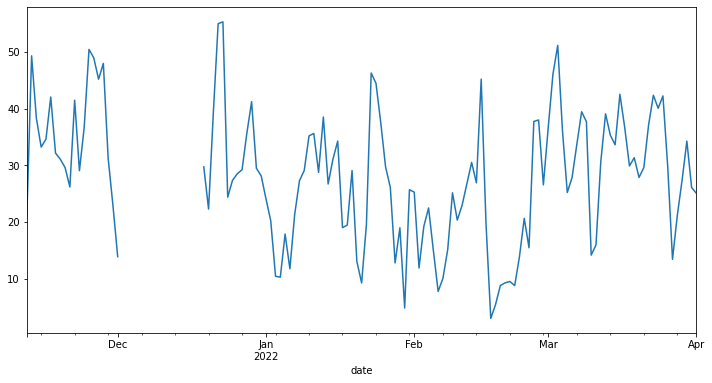

In [60]:
df.plot(figsize=(12, 6))

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [62]:
# # results.
# results = seasonal_decompose(df['PM1'])
# results.plot()

In [63]:
len(df)

141

In [64]:
train = df.iloc[:156]
test = df.iloc[156:]
train.head()
test.head()

Series([], Freq: D, Name: PM1, dtype: float64)

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [66]:
df.head(), df.tail()

(date
 2021-11-12    21.000000
 2021-11-13    49.277858
 2021-11-14    38.278285
 2021-11-15    33.235418
 2021-11-16    34.634061
 Freq: D, Name: PM1, dtype: float64,
 date
 2022-03-28    21.204297
 2022-03-29    27.397809
 2022-03-30    34.279789
 2022-03-31    26.114878
 2022-04-01    25.087708
 Freq: D, Name: PM1, dtype: float64)

In [69]:
# train.shape
# test.reshape(-1,1)
# train = scaler.transform(train)
# test = scaler.transform(test)
# test.reshape(-1,1)
# test.reshape(-1,1)

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

ValueError: Expected 2D array, got 1D array instead:
array=[21.         49.27785818 38.27828531 33.23541813 34.63406052 42.03373155
 32.17522871 31.09908644 29.625      26.21940928 41.47679325 29.07378777
 36.74645892 50.41081461 48.91777934 45.16924157 47.94241573 31.31368421
 23.01175549 13.96246973         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan 29.74698795 22.33027523 39.30872011 54.93144876 55.25269203
 24.42532221 27.37647059 28.53362573 29.25622255 35.65077036 41.2147016
 29.49891068 28.1712627  24.15014577 20.25890909 10.50874636 10.35921626
 17.94014599 11.83087149 21.35895577 27.296      29.12597951 35.20196672
 35.62504773 28.78103044 38.51591868 26.73583461 31.09992401 34.29053277
 19.06176134 19.51416376 29.10204871 13.13436293  9.34192037 19.60227273
 46.25869652 44.45867607 37.51976517 29.78988487 26.13576416 12.85334376
 19.04042715  4.92433062 25.73169797 25.31011609 11.97390535 19.27229437
 22.52677824 15.04148385  7.84691849 10.16169545 15.20402178 25.18881119
 20.39030956 22.97198106 26.74358006 30.53416384 26.94419134 45.1850735
 19.87192118  3.10847068  5.53913374  8.87381204  9.35806916  9.59757739
  8.87255773 13.96848899 20.70366176 15.52909852 37.73917995 37.99584435
 26.59269028 36.51037344 46.05596014 51.11562021 36.02607952 25.23635107
 27.88557214 33.73873533 39.44272212 37.69469697 14.2312951  16.02870091
 30.61558935 39.07453651 35.31834215 33.63723242 42.51775487 36.71750765
 29.91756135 31.36046952 27.88713405 29.61168385 37.13391835 42.35154757
 40.06502836 42.22473605 29.75009409 13.48893281 21.20429702 27.39780884
 34.27978884 26.11487834 25.08770764].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(
    scaled_train, scaled_train, length=n_input, batch_size=1
)

In [ ]:
X, y = generator[0]
print(f"Given the Array: \n{X.flatten()}")
print(f"Predict this y: \n {y}")

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(
    scaled_train, scaled_train, length=n_input, batch_size=1
)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation="relu", input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator, epochs=2)

Epoch 1/2
144/144 [==============================] - 6s 33ms/step - loss: 0.0478
Epoch 2/2
144/144 [==============================] - 4s 30ms/step - loss: 0.0218


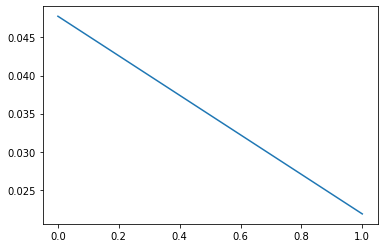

In [ ]:
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 248ms/step


array([[0.7834252]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
test_predictions

[array([0.7834252], dtype=float32),
 array([0.8321211], dtype=float32),
 array([0.89059263], dtype=float32),
 array([0.9099806], dtype=float32),
 array([0.9120081], dtype=float32),
 array([0.8763252], dtype=float32),
 array([0.8352564], dtype=float32),
 array([0.8060941], dtype=float32),
 array([0.7900716], dtype=float32),
 array([0.81454617], dtype=float32),
 array([0.8536212], dtype=float32),
 array([0.90632623], dtype=float32)]

In [ ]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test["Predictions"] = true_predictions

C:\Users\admin\AppData\Local\Temp\ipykernel_20156\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

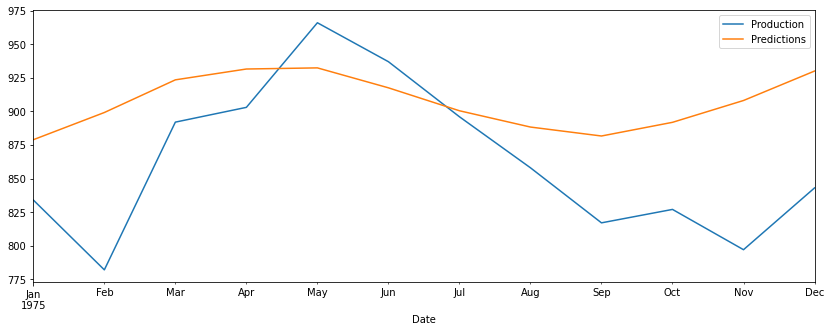

In [ ]:
test.plot(figsize=(14, 5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test["Production"], test["Predictions"]))
print(rmse)

63.446036379834126
